In [103]:
from stylo.image import LayeredImage
from stylo.shape import Circle, Ellipse, Triangle, Rectangle
from stylo.color import FillColor
from stylo.domain.transform import translate, rotate

from math import pi

%matplotlib inline

In [148]:
orange = FillColor("ffaa00")
darker_orange = FillColor("dd9900")
black = FillColor("000000")
green = FillColor("00dd00")

In [69]:
def make_segment(size=0.8):
    return Ellipse(0, -0.15, 1/2, 1, size)

In [70]:
middle = make_segment()
middle_outline = make_segment(0.825)

left = make_segment() >> translate(-0.5, 0)
left_outline = make_segment(0.825) >> translate(-0.5, 0)

right = make_segment() >> translate(0.5, 0)
right_outline = make_segment(0.825) >> translate(0.5, 0)

In [85]:
left_eye = Triangle((0,0), (-0.25, -0.1), (-0.25, 0.1)) >> rotate(pi/8) >> translate(-0.35, 0) 
right_eye = Triangle((0, 0), (0.25, -0.1), (0.25, 0.1)) >> rotate(-pi/8) >> translate(0.35, 0)

nose = Triangle((0,0), (-0.15, -0.15), (0.15, -0.15))

In [144]:
cutouts = Circle(0, 0.5, 1)
cutouts |= Rectangle(-0.3, -0.45, 0.15, 0.2)
cutouts |= Rectangle(0.2, -0.475, 0.15, 0.2)
cutouts |= Rectangle(-0.05, -0.7, 0.15, 0.2)

mouth = Ellipse(0, -.3, 2, 1, 0.4) & ~cutouts

In [178]:
offset = 0.1
stem = Ellipse(0 + offset, 0.4, 1, 8, 0.2) & ~Circle(0.25 + offset, 0.6, 0.35)

CPU times: user 1.6 s, sys: 646 ms, total: 2.24 s
Wall time: 2.25 s


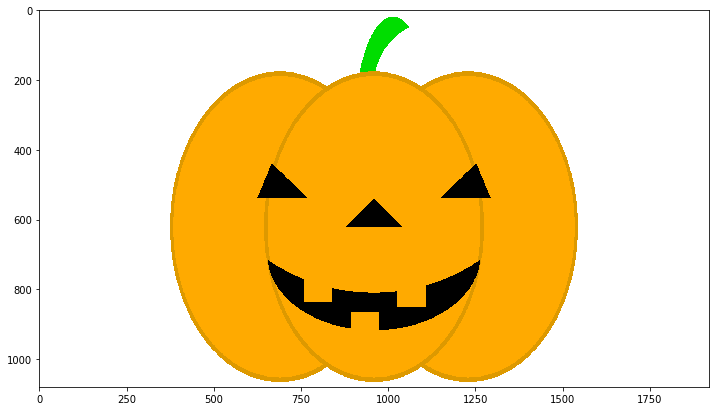

In [181]:
%%time

image = LayeredImage()

image.add_layer(stem, green)

image.add_layer(left_outline, darker_orange)
image.add_layer(right_outline, darker_orange)
image.add_layer(left, orange)
image.add_layer(right, orange)

image.add_layer(middle_outline, darker_orange)
image.add_layer(middle, orange)

image.add_layer(left_eye, black)
image.add_layer(right_eye, black)
image.add_layer(nose, black)

image.add_layer(mouth, black)

#image.add_layer(test, red)

image(1920, 1080);